In [366]:
# Importing Essential Libraries And Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [367]:
df=pd.read_csv("/content/train.csv")

In [368]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [369]:
df.set_index("id",inplace=True)

In [370]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 1 to 6700
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 837.5+ KB


In [372]:
df.isna().sum()

departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [373]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [374]:
df['departure city'].value_counts()

New York City    610
Los Angeles      538
Philadelphia     355
San Francisco    319
Houston          273
                ... 
Tyler              1
Manhattan          1
Yucaipa            1
Santa Maria        1
Pensacola          1
Name: departure city, Length: 469, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


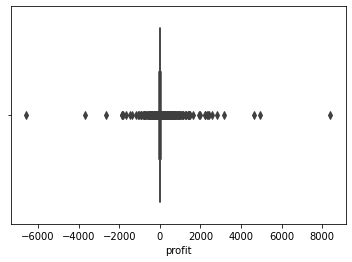

In [375]:
sns.boxplot(df['profit'])

In [376]:
df=df[df['profit']<1500]


In [377]:
df=df[df['profit']>-1000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


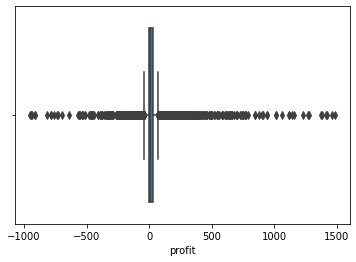

In [378]:
sns.boxplot(df['profit'])


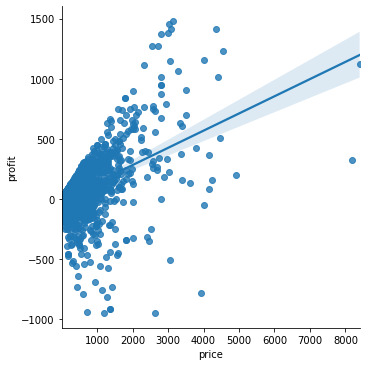

In [379]:
sns.lmplot(x='price',y='profit',data=df)

In [380]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [381]:
df['discount'].unique().tolist()

[0.2, 0.0, 0.1, 0.7, 0.15, 0.8, 0.6, 0.4, 0.5, 0.3, 0.32, 0.45]

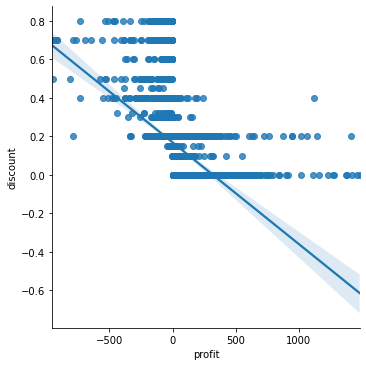

In [382]:
sns.lmplot(y='discount',x='profit',data=df)


In [383]:
# dis={0.00:12,0.20:11,0.1:10,0.15:9,0.3:8,0.32:7,0.4:6,0.5:5,0.45:4,0.6:3,0.7:2,0.8:1}
# df['dis_map']=df['discount'].map(dis)

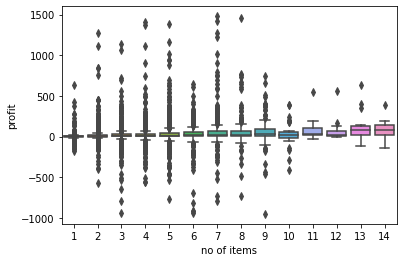

In [384]:
sns.boxplot(x='no of items',y='profit',data=df)

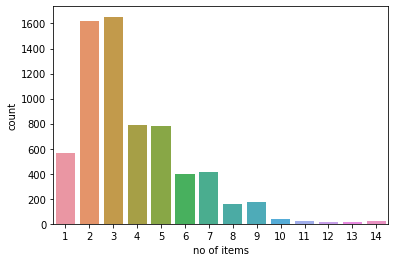

In [385]:
sns.countplot(x='no of items',data=df)


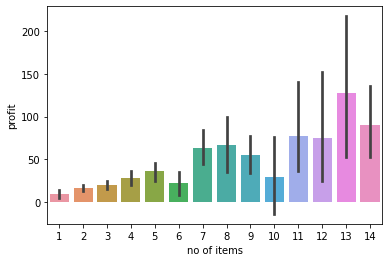

In [386]:
sns.barplot(x='no of items',y='profit',data=df)

In [387]:
# items={7:14,5:13,4:12,2:11,3:10,1:9,6:8,8:7,9:6,10:5,13:4,12:3,11:2,14:1}
items={13:14,14:13,12:12,11:11,8:10,7:9,9:8,5:7,4:6,6:5,10:4,3:3,2:2,1:1}
df['item_map']=df['no of items'].map(items)

In [388]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map
id,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2


In [389]:
df.location.value_counts()

West       2117
East       1920
Central    1542
South      1095
Name: location, dtype: int64

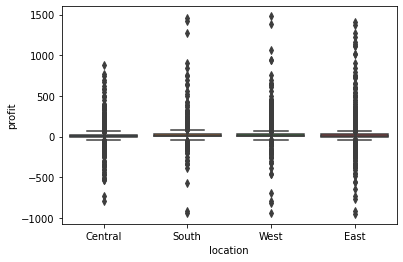

In [390]:
sns.boxplot(x='location',y='profit',data=df)


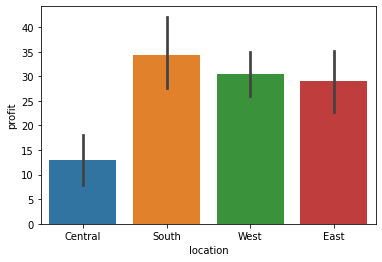

In [391]:
sns.barplot(x='location',y='profit',data=df)


In [392]:
# loc={'East':4,'South':3,'West':2,'Central':1}
loc={'East':1,'South':3,'West':2,'Central':4}
df['loc_map']=df['location'].map(loc)

In [393]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map
id,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4


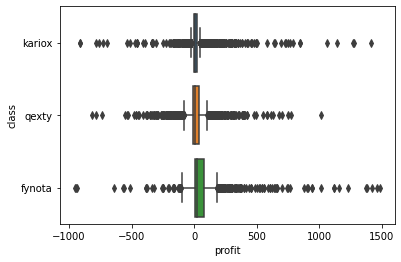

In [394]:
sns.boxplot(y='class',x='profit',data=df)

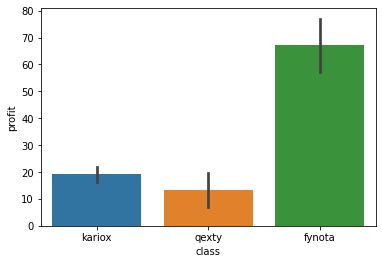

In [395]:
sns.barplot(x='class',y='profit',data=df)

In [396]:
class_map={'fynota':3,'kariox':2, 'qexty':1}
df['class_map']=df['class'].map(class_map)

In [397]:
df.segment.value_counts()

Consumer       3507
Corporate      2043
Home Office    1124
Name: segment, dtype: int64

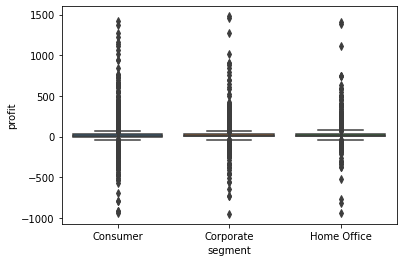

In [398]:
sns.boxplot(x='segment',y='profit',data=df)


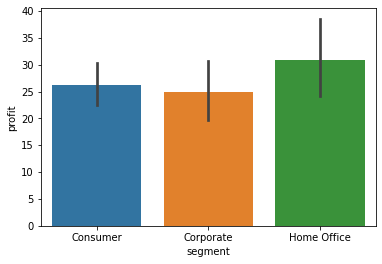

In [399]:
sns.barplot(x='segment',y='profit',data=df)


In [400]:
segment={'Home Office':3,'Consumer':2,'Corporate':1}
df['seg_map']=df['segment'].map(segment)

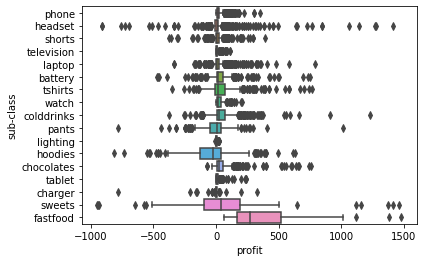

In [401]:
sns.boxplot(y='sub-class',x='profit',data=df)


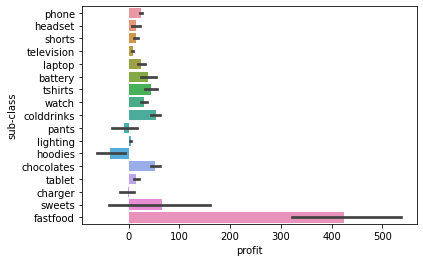

In [402]:
sns.barplot(y='sub-class',x='profit',data=df)

In [403]:
# sub={'fastfood':17,'phone':16,'tablet':15,'television':14,'watch':13,'chocolates':12,'sweets':11,'tshirts':10,'battery':9,'colddrinks':8,'laptop':7,'headset':6,'shorts':5,'pants':4,'charger':3,'lighting':2,'hoddies':1}
sub={'fastfood':17,'sweets':16,'chocolates':15,'colddrinks':14,'tshirts':13,'battery':12,'laptop':11,'phone':10,'watch':9,'headset':8,'shorts':7,'tablet':6,'television':5,'pants':4,'charger':3,'lighting':2,'hoddies':1}
df['sub_class_map']=df['sub-class'].map(sub)

In [404]:
df['delivery type'].value_counts()

Standard Class    4067
Second Class      1286
First Class        964
Same Day           356
Name: delivery type, dtype: int64

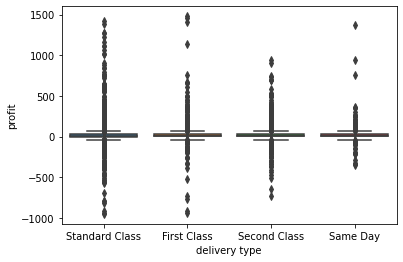

In [405]:
sns.boxplot(x='delivery type',y='profit',data=df)


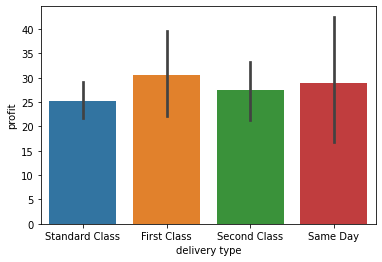

In [406]:
sns.barplot(x='delivery type',y='profit',data=df)



In [407]:
delivery={'First Class':4,'Same Day':3,'Second Class':2,'Standard Class':1}
df['del_map']=df['delivery type'].map(delivery)

In [408]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map
id,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0


In [409]:
df.groupby('departure state')['profit'].mean()

departure state
Alabama                 117.565516
Arizona                 -13.740675
Arkansas                 74.372790
California               35.164709
Colorado                -17.289336
Connecticut              42.327713
Delaware                 50.963245
District of Columbia    128.065663
Florida                  -3.211860
Georgia                  54.300818
Idaho                    48.285731
Illinois                -17.851031
Indiana                  55.671662
Iowa                     64.853436
Kansas                   31.837728
Kentucky                 73.272445
Louisiana                35.114221
Maine                    56.810775
Maryland                 62.508409
Massachusetts            52.863695
Michigan                 49.772869
Minnesota                74.656660
Mississippi              53.610355
Missouri                 61.533664
Montana                 130.211036
Nebraska                 39.859425
Nevada                   43.724007
New Hampshire            61.314440
New 

In [410]:
df.groupby('departure state')['profit'].describe().sort_values('mean',ascending=False)['mean'].tolist()

[266.74805,
 130.2110357142857,
 128.0656625,
 124.30173529411765,
 117.56551555555555,
 100.196,
 89.33402207792204,
 77.73306555555554,
 74.65666,
 74.37279024390247,
 73.27244545454545,
 64.85343571428572,
 63.249069387755085,
 62.508408823529436,
 61.53366410256411,
 61.31443999999999,
 59.77745697674421,
 56.81077500000001,
 55.67166206896551,
 54.76552195945939,
 54.45681052631579,
 54.300818032786886,
 53.610354999999984,
 52.863694791666695,
 52.804423544631334,
 50.963245454545444,
 49.772868947368394,
 48.28573076923078,
 43.724006666666675,
 43.36526764705883,
 42.32771250000001,
 39.859425,
 35.16470896191192,
 35.11422142857143,
 31.83772777777778,
 21.981713333333335,
 12.189150000000001,
 -3.2118600790513847,
 -3.3132907975460104,
 -8.652604255319146,
 -9.62410891089109,
 -11.03575309200603,
 -13.740675000000001,
 -17.28933553719008,
 -17.85103095975234,
 -19.539885901639337,
 -22.57610462724936]

In [411]:
df_dic = df.groupby('departure state')['profit'].mean().reset_index()


In [412]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-50,0,50,100,300] , labels = [1,2,3,4])

In [413]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)

In [414]:
dep_state = df_dic.groupby('departure state')['loc_class'].mean().to_dict()

In [415]:
df['dep_class'] = df['departure state'].map(dep_state)

In [416]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class
id,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2


In [417]:
df.groupby('departure city')['profit'].describe().sort_values('mean',ascending=False)['mean'].tolist()


[642.8857499999999,
 477.4212,
 395.7479,
 356.225,
 277.38315,
 254.84459999999999,
 225.8313,
 218.30646666666667,
 214.9418666666667,
 197.8383875,
 197.80265454545454,
 159.22480000000002,
 158.41171666666665,
 152.495,
 152.41039166666667,
 147.09998333333334,
 146.4036,
 145.2816,
 140.86516,
 134.76435,
 133.08245,
 128.0656625,
 125.8890125,
 121.55194999999999,
 120.23112608695652,
 119.91311111111109,
 118.71013750000002,
 118.34866363636364,
 115.75424615384617,
 115.10452000000001,
 111.0668,
 110.51135,
 110.0528,
 102.97095,
 100.196,
 99.65924444444445,
 97.98893333333335,
 96.9651,
 92.35585555555555,
 92.0835,
 88.32825,
 88.27301904761904,
 86.71202727272727,
 84.44408000000001,
 83.80644,
 82.9507,
 82.81153333333334,
 82.52032222222223,
 82.25283448275862,
 81.583,
 80.736,
 79.48148666666665,
 78.70830000000001,
 77.27137499999999,
 76.17866666666666,
 75.20911666666667,
 74.99786666666667,
 73.16365714285713,
 72.75079999999998,
 70.3548,
 70.10736999999999,
 69.5

In [418]:
df_dic = df.groupby('departure city')['profit'].mean().reset_index()


In [419]:
df_dic.profit.min()

-200.61916000000002

In [420]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [421]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)
dep_city = df_dic.groupby('departure city')['loc_class'].mean().to_dict()
df['dep_city_class'] = df['departure city'].map(dep_city)


In [422]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class
id,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2


In [423]:
df_dic = df.groupby('address code')['profit'].mean().reset_index()


In [424]:
df_dic.profit.min()

-200.61916000000002

In [425]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [426]:
df_dic['loc_class'].value_counts()

2    308
3    132
1    122
Name: loc_class, dtype: int64

In [427]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)
add_code = df_dic.groupby('address code')['loc_class'].mean().to_dict()
df['address_class'] = df['address code'].map(add_code)


In [428]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
id,,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2,2


In [429]:
df.corr()

,discount,price,no of items,RID,profit,address code,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
discount,1.000000,-0.046098,0.000617,0.011687,-0.307106,0.067860,-0.000883,0.173545,-0.065329,-0.018681,-0.032142,-0.004485,-0.633804,-0.538099,-0.570047
price,-0.046098,1.000000,0.246227,-0.008135,0.527843,-0.010998,0.234367,-0.025290,-0.004221,0.001573,0.266905,0.006069,0.092791,0.107536,0.119714
no of items,0.000617,0.246227,1.000000,-0.003631,0.122635,0.004494,0.905382,0.014305,-0.023504,-0.004722,-0.013741,-0.022025,0.007853,0.013052,0.012659
RID,0.011687,-0.008135,-0.003631,1.000000,0.002745,0.009695,-0.011543,0.017236,-0.005508,-0.026887,-0.002920,-0.021308,-0.008074,0.003529,0.008032
profit,-0.307106,0.527843,0.122635,0.002745,1.000000,-0.049335,0.128429,-0.042680,0.136769,0.015166,0.189190,0.016052,0.284077,0.285107,0.311044
address code,0.067860,-0.010998,0.004494,0.009695,-0.049335,1.000000,0.009198,0.341801,-0.001524,0.003803,0.019124,-0.014260,-0.268545,-0.190403,-0.145060
item_map,-0.000883,0.234367,0.905382,-0.011543,0.128429,0.009198,1.000000,0.022561,-0.018081,-0.002817,-0.014674,-0.012240,0.009105,0.018249,0.016170
loc_map,0.173545,-0.025290,0.014305,0.017236,-0.042680,0.341801,0.022561,1.000000,0.005750,0.002384,0.020291,-0.056808,-0.270086,-0.221328,-0.108755
class_map,-0.065329,-0.004221,-0.023504,-0.005508,0.136769,-0.001524,-0.018081,0.005750,1.000000,0.014053,0.514819,0.010675,-0.008115,-0.014675,-0.009068
seg_map,-0.018681,0.001573,-0.004722,-0.026887,0.015166,0.003803,-0.002817,0.002384,0.014053,1.000000,-0.005137,-0.002167,0.030362,-0.000679,0.007755


In [430]:
df.drop('RID',axis=1 ,inplace=True)

In [431]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
id,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2,2


In [432]:
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['placement date'] = pd.to_datetime(df['placement date'])
df['duration'] = (df['delivery date'] - df['placement date']).dt.days

In [433]:
df['delivery_month']=df['delivery date'].dt.month
df['delivery_week']=df['delivery date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [434]:
df['placement_month']=df['placement date'].dt.month
df['placement_week']=df['placement date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


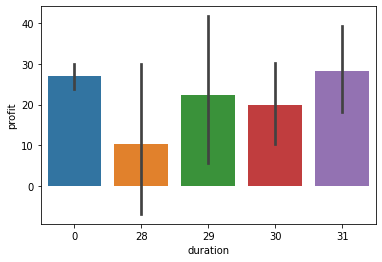

In [435]:
sns.barplot(x='duration',y='profit',data=df)

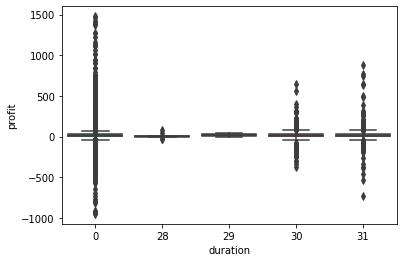

In [436]:
sns.boxplot(x='duration',y='profit',data=df)


In [437]:
# duration={29:5,28:4,30:3,31:2,0:1}
duration={31:5,0:4,29:3,30:2,28:1}
df['duration_map']=df['duration'].map(duration)

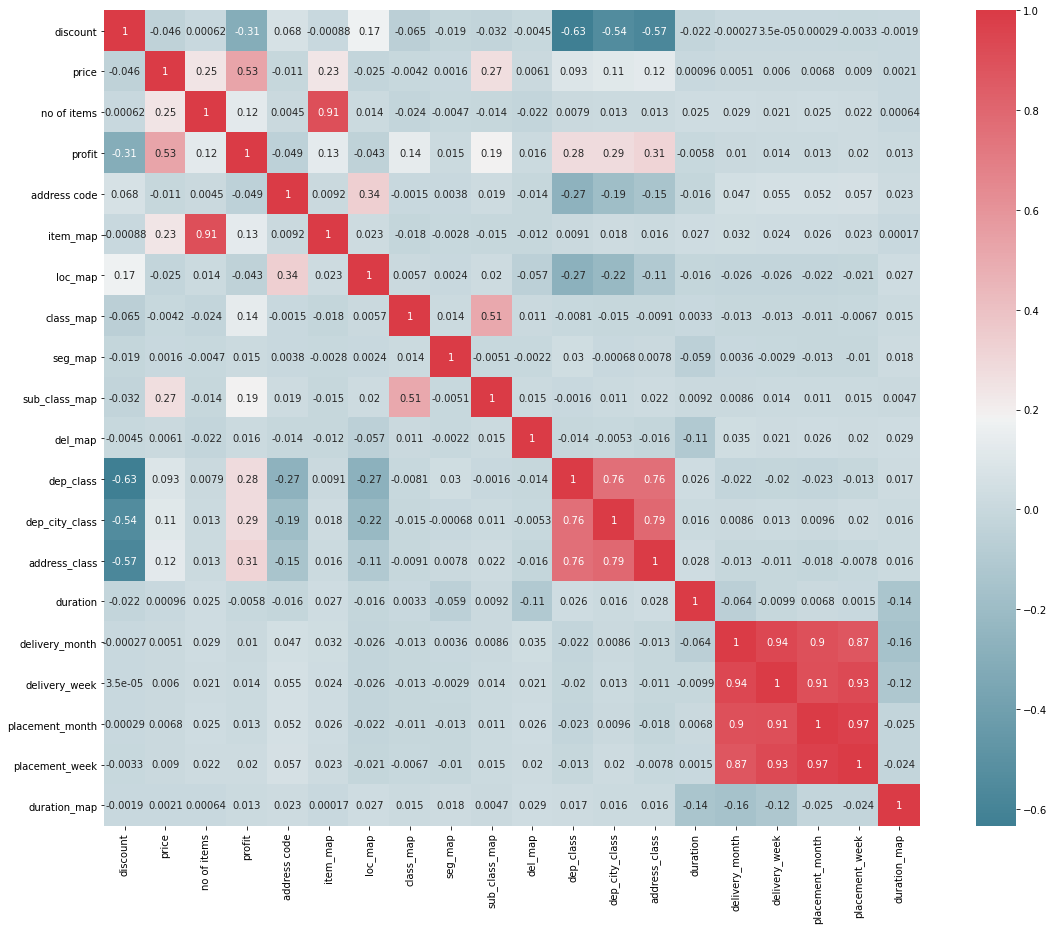

In [438]:
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

### TEST DATA

In [439]:
test=pd.read_csv("/content/test.csv")

In [440]:
test.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01


In [441]:
test.isna().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      0
RID                0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [442]:
test.drop('RID',axis=1,inplace=True)

In [443]:

test['item_map']=test['no of items'].map(items)

In [444]:

test['loc_map']=test['location'].map(loc)

In [445]:

test['class_map']=test['class'].map(class_map)

In [446]:

test['seg_map']=test['segment'].map(segment)

In [447]:

test['sub_class_map']=test['sub-class'].map(sub)

In [448]:

test['del_map']=test['delivery type'].map(delivery)

In [449]:
# df_dic = test.groupby('departure state')['profit'].mean().reset_index()


In [450]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-50,0,50,100,300] , labels = [1,2,3,4])

In [451]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)

In [452]:
# DIC = df_dic.groupby('departure state')['loc_class'].mean().to_dict()

In [453]:
test['dep_class'] = test['departure state'].map(dep_state)

In [454]:
# df_dic = df.groupby('departure city')['profit'].mean().reset_index()


In [455]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [456]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)
# DIC = df_dic.groupby('departure city')['loc_class'].mean().to_dict()
test['dep_city_class'] = test['departure city'].map(dep_city)


In [457]:
# df_dic = df.groupby('address code')['profit'].mean().reset_index()


In [458]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])
# 

In [459]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)
# DIC = df_dic.groupby('address code')['loc_class'].mean().to_dict()
test['address_class'] = test['address code'].map(add_code)


In [460]:
test['delivery date'] = pd.to_datetime(test['delivery date'])
test['placement date'] = pd.to_datetime(test['placement date'])
test['duration'] = (test['delivery date'] - test['placement date']).dt.days

In [461]:
test['delivery_month']=test['delivery date'].dt.month
test['delivery_week']=test['delivery date'].dt.week
test['placement_month']=test['placement date'].dt.month
test['placement_week']=test['placement date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [462]:
# duration={31:5,0:4,29:3,30:2,28:1}
test['duration_map']=test['duration'].map(duration)

In [463]:
test.set_index('id',inplace=True)

In [464]:
test.columns

Index(['departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'delivery date',
       'address code', 'departure state', 'placement date', 'item_map',
       'loc_map', 'class_map', 'seg_map', 'sub_class_map', 'del_map',
       'dep_class', 'dep_city_class', 'address_class', 'duration',
       'placement_month', 'placement_week', 'delivery_month', 'delivery_week',
       'duration_map'],
      dtype='object')

In [465]:
df.columns

Index(['departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'profit',
       'delivery date', 'address code', 'departure state', 'placement date',
       'item_map', 'loc_map', 'class_map', 'seg_map', 'sub_class_map',
       'del_map', 'dep_class', 'dep_city_class', 'address_class', 'duration',
       'delivery_month', 'delivery_week', 'placement_month', 'placement_week',
       'duration_map'],
      dtype='object')